In [326]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [327]:
from __future__ import division
import numpy as np
from setup import *
from OrbitalMotion import numerical_orbital_evolution, analytical_orbital_evolution, analytical_split
import sys
#from symfit import parameters, variables, sin, cos, Fit
c,G,Msolar,AU, pc = univeral_constants()
n = 1

In [328]:

# fitting functions for the eccentricity
def doube_trig_function(t,A,B,omega,
                           offset,decay):
    return (A*np.sin(omega*t) + B*np.cos(omega*t) 
           + offset + decay*t)

def doube_trig_function2(t,*a):
    offset = a[0]
    ret = offset
    
    
    for i in range(n):
        an = a[3*(i) + 1]
        bn = a[3*(i) + 2]
        omega = a[3*(i) + 3]
    
        ret += an*np.sin(omega*t) + bn*np.cos(omega*t) 
    return ret
    
def extract(data,index,tfine):
    
    
    

    t = data[:,0]
    f = data[:,index] 
    print ('extract ecc')
    
    sigma = np.ones(len(t))
    
    #sigma[[0, 113, 258, 403, 548, 694, 839, 984, 1129, 1274, 1419, 1565, 1710, 1855, 2000, 2145, 2291, 2436, 2581, 2726, 2871, 3017, 3154]] = 1e-1
    
    sigma[[0, -1]] = 1e-4 #weight the end points
    
    func = doube_trig_function
    
    dA = (f.max() + f.min()) / 2
    y_shifted = f - dA
    omega = np.pi * np.sum(y_shifted[:-1] * y_shifted[1:] < 0) / (t.max() - t.min())
    offset = dA

    

    p0 = [offset]
    for i in range(n):
        p0.extend([dA,dA,omega*(i+1)])
        

    p0 = [
         dA,
         dA,
         omega,
        offset,1e-6
    ]
        
    #aa = (dA,dA,omega,dA)    
        
    popt, pcov = curve_fit(func, t,f,p0=p0,sigma=sigma)
    #popt,pcov = curve_fit(fourier,t,f,p0=aa,sigma=sigma)
    
    


    return func(t, *popt)
    
    #return popt
    
    
    
#def fourier_series(t, f, n=0):
    """
    Returns a symbolic fourier series of order `n`.

    :param n: Order of the fourier series.
    :param t: Independent variable
    :param f: Frequency of the fourier series
    """
    # Make the parameter objects for all the terms
    #a0, *cos_a = parameters(','.join(['a{}'.format(i) for i in range(0, n + 1)]))
    #sin_b = parameters(','.join(['b{}'.format(i) for i in range(1, n + 1)]))
    # Construct the series
    #series = a0 + sum(ai * cos(i * f * t) + bi * sin(i * f * t)
            #         for i, (ai, bi) in enumerate(zip(cos_a, sin_b), start=1))
    #return series
    
    
    
    
    
def fourier(t, *a):
    an = a[1]
    bn = a[2]
    omega = a[3]
    offset = a[0]
    ret = offset + an*np.sin(omega*t) + bn*np.cos(omega*t) 

    return ret

No handles with labels found to put in legend.


extract ecc
Symmetry point of approximation =  0.835545929561657
Symmetry point of numericalmmmm =  0.8211892133275075


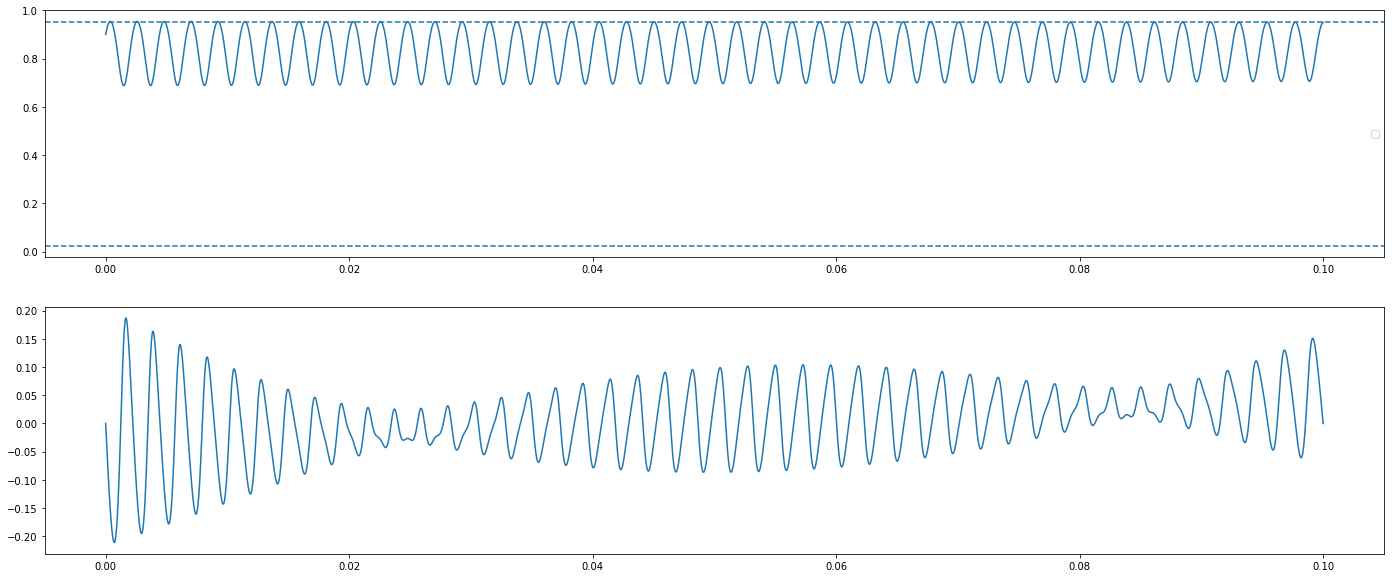

In [333]:
%matplotlib inline
from scipy.optimize import curve_fit 




data = np.load('EccentricityData/edata_e=0.9.npy')

t = data[:,0]
e = data[:,1]

dataHR = np.load('EccentricityData/edataHR_e=0.9.npy')
tH = dataHR[:,0]
eH = dataHR[:,1]



import matplotlib.pyplot as plt
fig = plt.figure(figsize=(24,10)) 
ax1 = plt.subplot2grid((2,1), (0,0))
ax2 = plt.subplot2grid((2,1), (1,0),sharex=ax1)

#Now try and fit it. 
e_approx = extract(data,1,tH)

tplot = t/(365*24*3600)


ax1.plot(tplot,e)

#ax1.plot(tplot,e_approx,label='approx')


print ('Symmetry point of approximation = ', (max(e_approx) + min(e_approx))/2)
print ('Symmetry point of numericalmmmm = ', (max(e) + min(e))/2)

#Get the minima
#minima = np.r_[True, e[1:] < e[:-1]] & np.r_[e[:-1] < e[1:], True]
#indexes = [i for i, x in enumerate(minima) if x]


#tMIN = [ t[i] for i in indexes]
#eMIN = [ e[i] for i in indexes]
#tMIN = tMIN[1:-1]
#eMIN = eMIN[1:-1]

#print (indexes)
#ax1.scatter(tMIN,eMIN)
ax1.legend()





de = (e_approx - e)/e
ax2.plot(tplot,de)
plt.savefig('example.png')


maxe = 0.9534139211946439
mine= 0.023106791470095554
ax1.axhline(maxe,linestyle='--')
ax1.axhline(mine,linestyle='--')






#ax1.set_ylim(0.28,0.35)
#ax1.set_xlim(1e5,2e5)